In [7]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
# import USA daily tracking data
df = pd.read_csv("https://covidtracking.com/api/v1/us/daily.csv")
# change date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
# rename some columns
df = df.rename(columns={'positive':'total_positives', 
                        'positiveIncrease':'new_positives',
                        'deathIncrease':'new_deaths',
                        'totalTestResults':'total_test_results',
                        'totalTestResultsIncrease':'new_test_results',
                        'hospitalizedCurrently':'hospitalized_currently',
                        'onVentilatorCurrently':'on_ventilator_currently'})

In [6]:
# delete feb data - nothing really starts till march in USA
df = df[:104]

In [17]:
def plot(*args, x='date', color='b'):
    """*args are column names from the USA COVID-19 dataframe (df). 
    Each arg is plotted against x, which defaults to 'date'
    Use df.info() to see column names"""
    # unpack args (stored in tuple) to list form
    a = []
    a.append(x)
    for arg in args:
        a.append(arg)
    # subset df for our plots. dropna() ensures same date range for all plots
    plot_data = df[a].dropna()
    # format dates
    locator = mdates.MonthLocator()
    formatter = mdates.DateFormatter('%m-%d')
    # set up axes for subplots
    fig, ax = plt.subplots(nrows=len(args), ncols=1, figsize=(8, 8))
    # for space between plots
    fig.tight_layout()
    if len(args) == 1:
        args = ''.join(args)
        # format date on x-axis
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.set_xlim(plot_data[x].iloc[-1], plot_data[x][0])
        # make plot
        ax.plot(plot_data[x], plot_data[args], color=color, linestyle='-')
        # set titles
        ax.set_title(args)
    else:
        for i in range(len(args)):
            # format date on x-axis
            ax[i].xaxis.set_major_locator(locator)
            ax[i].xaxis.set_major_formatter(formatter)
            ax[i].set_xlim(plot_data[x].iloc[-1], plot_data[x][0])
            # make plot
            ax[i].plot(plot_data[x], plot_data[args[i]], color=color, linestyle='-')
            # set titles
            ax[i].set_title(args[i])
    # style
    plt.style.use('ggplot')
    # show plots
    plt.show()


In [21]:
#get column names for plotting
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
date                       104 non-null datetime64[ns]
states                     104 non-null int64
total_positives            104 non-null int64
negative                   104 non-null float64
pending                    104 non-null float64
hospitalized_currently     91 non-null float64
hospitalizedCumulative     87 non-null float64
inIcuCurrently             82 non-null float64
inIcuCumulative            83 non-null float64
on_ventilator_currently    83 non-null float64
onVentilatorCumulative     76 non-null float64
recovered                  83 non-null float64
dateChecked                104 non-null object
death                      104 non-null float64
hospitalized               87 non-null float64
lastModified               104 non-null object
total                      104 non-null int64
total_test_results         104 non-null int64
posNeg                     104 non-null in

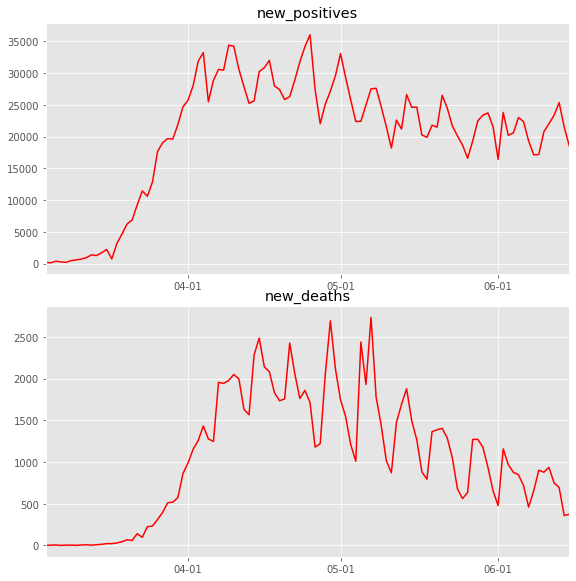

In [18]:
plot('new_positives', 'new_deaths', color='r')

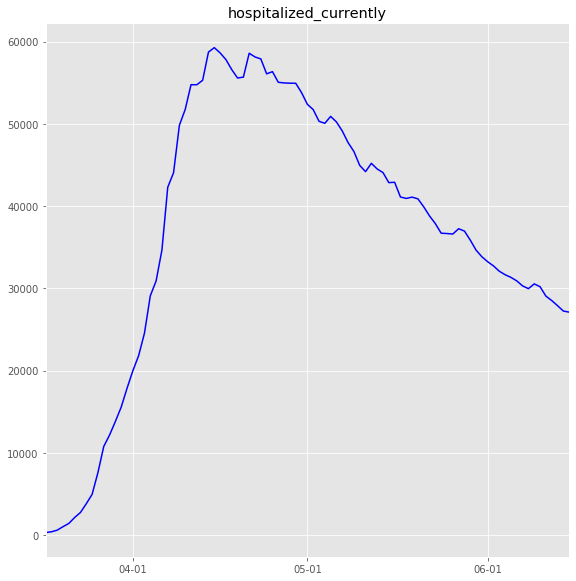

In [19]:
plot('hospitalized_currently')